In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import csv
plt.style.use('fivethirtyeight')

### Author: Harsha Mallajosyula
#### Data Scientist
#### City of Los Angeles Mayor's Office

### Reading job data files and cleaning the data 

In [2]:
df_jobs=pd.read_csv('Monster_Los_Angeles_Scraped_Data_20_07_10_02_2018.csv')

In [3]:
df_jobs_1=pd.read_csv('Monster_Sacramento_Scraped_Data_12_45_10_04_2018.csv')

In [4]:
df_jobs_2=pd.read_csv('Monster_Fresno_Scraped_Data_12_38_10_09_2018.csv')

In [5]:
df_jobs_3=pd.read_csv('Monster_SanDiego_Scraped_Data_17_28_10_04_2018.csv')

In [6]:
df_jobs_4=pd.read_csv('Monster_SanFrancisco_Scraped_Data_19_52_10_03_2018.csv')

In [7]:
df_jobs_1.head()

Unnamed: 0                                            0  \
0           0                Superintendent - Construction   
1           1  Environmental Engineer Construction Manager   
2           2                                Error loading   
3           3               Mechanical / Plumbing Designer   
4           4                                      Foreman   

                     1               2  \
0          CyberCoders  Sacramento, CA   
1  TERRA PACIFIC GROUP  sacramento, CA   
2        Error loading   Error loading   
3          TechniPower  SACRAMENTO, CA   
4               Sunrun  Sacramento, CA   

                                                   3  
0  Based in Sacramento, CA we are a dynamically g...  
1  Terra Pacific Group, Inc. is seeking a qualifi...  
2                                      Error loading  
3  Responsible for designing HVAC and plumbing sy...  
4  Overview\r\n\r\nForeman: Position Summary\r\n\...

In [8]:
df_jobs_1.drop(df_jobs_1.columns[0],axis=1,inplace=True)

In [9]:
df_jobs_1.rename(columns={'0': 'Job_name', '1': 'Company_name', '2': 'Location_name', '3': 'Job_description'}, inplace=True)

In [10]:
df_jobs_1.head()

Job_name         Company_name  \
0                Superintendent - Construction          CyberCoders   
1  Environmental Engineer Construction Manager  TERRA PACIFIC GROUP   
2                                Error loading        Error loading   
3               Mechanical / Plumbing Designer          TechniPower   
4                                      Foreman               Sunrun   

    Location_name                                    Job_description  
0  Sacramento, CA  Based in Sacramento, CA we are a dynamically g...  
1  sacramento, CA  Terra Pacific Group, Inc. is seeking a qualifi...  
2   Error loading                                      Error loading  
3  SACRAMENTO, CA  Responsible for designing HVAC and plumbing sy...  
4  Sacramento, CA  Overview\r\n\r\nForeman: Position Summary\r\n\...

In [11]:
df_jobs_2.drop(df_jobs_2.columns[0],axis=1,inplace=True)

In [12]:
df_jobs_2.rename(columns={'0': 'Job_name', '1': 'Company_name', '2': 'Location_name', '3': 'Job_description'}, inplace=True)

In [13]:
df_jobs_2.head()

Job_name           Company_name Location_name  \
0    Construction Manager               Randstad    Fresno, CA   
1     WELDERS/FABRICATORS       Denham Resources    FRESNO, CA   
2    Construction Builder       Symbia Logistics    Fresno, CA   
3  Civil Project Engineer  Blair, Church & Flynn    Clovis, CA   
4       Commercial Roofer       D. C. Taylor Co.    Fresno, CA   

                                     Job_description  
0  Contract position: Construction Supervisor opp...  
1  Denham Resources has an excellent opportunity ...  
2  Description\r\nSymbia Logistics is a fast pace...  
3  Blair, Church & Flynn Consulting Engineers is ...  
4  Commercial Roofer\r\nJOB SUMMARY\r\nA D. C. Ta...

In [14]:
df_jobs_3.drop(df_jobs_3.columns[0],axis=1,inplace=True)

In [15]:
df_jobs_3.rename(columns={'0': 'Job_name', '1': 'Company_name', '2': 'Location_name', '3': 'Job_description'}, inplace=True)

In [16]:
df_jobs_3.head()

Job_name                      Company_name  \
0    Architectural Job Captain                           Aerotek   
1  Production Welder Tradesman            HII San Diego Shipyard   
2                Error loading                     Error loading   
3            Structural Welder  AMERI-FORCE CRAFT SERVICES, INC.   
4      Construction Supervisor                         Workright   

   Location_name                                    Job_description  
0  San Diego, CA  JOB CAPTAINS!\r\nWe are looking for talented, ...  
1  San Diego, CA  Production Welder Tradesman – job ID: 18-032\r...  
2  Error loading                                      Error loading  
3  San Diego, CA  Job Description\r\nLays out and fits pipe and/...  
4  San Diego, CA  Job Purpose:\r\nCompletes construction project...

In [17]:
df_jobs_4.drop(df_jobs_4.columns[0],axis=1,inplace=True)

In [18]:
df_jobs_4.rename(columns={'0': 'Job_name', '1': 'Company_name', '2': 'Location_name', '3': 'Job_description'}, inplace=True)

In [19]:
df_jobs_4.head()

Job_name  \
0                 Construction Senior Superintendent   
1        Environmental Engineer Construction Manager   
2                                      Error loading   
3  Construction Project Manager: Tenant Improvements   
4  Construction Project Manager - Senior and Asso...   

                 Company_name      Location_name  \
0                      Webcor  San Francisco, CA   
1         TERRA PACIFIC GROUP  San Francisco, CA   
2               Error loading      Error loading   
3                 CyberCoders  San Francisco, CA   
4  Reliant Project Management  SAN FRANCISCO, CA   

                                     Job_description  
0  Who We Are:\r\nWebcor employs people of integr...  
1  Terra Pacific Group, Inc. is seeking a qualifi...  
2                                      Error loading  
3  We are a third generation construction company...  
4  Have you adjusted property claims or worked as...

In [20]:
df_jobs.head()

Job_name      Company_name    Location_name  \
0  Construction Senior Superintendent            Webcor  Los Angeles, CA   
1                       Error loading     Error loading    Error loading   
2                       Error loading     Error loading    Error loading   
3        Construction Project Manager      LavaRock LLC  Los Angeles, CA   
4        Construction Project Manager  Michael Page USA  Los Angeles, CA   

                                     Job_description  
0   Who We Are:\r\nWebcor employs people of integ...  
1                                      Error loading  
2                                      Error loading  
3  Join one of the Top Growing General Contractor...  
4  Global civil construction firm based in Los An...

In [21]:
df_jobs.dtypes

Job_name           object
Company_name       object
Location_name      object
Job_description    object
dtype: object

In [22]:
df_jobs = df_jobs[df_jobs['Job_name']!='Error loading']

In [23]:
df_jobs_1 = df_jobs_1[df_jobs_1['Job_name']!='Error loading']

In [24]:
df_jobs_2 = df_jobs_2[df_jobs_2['Job_name']!='Error loading']

In [25]:
df_jobs_3 = df_jobs_3[df_jobs_3['Job_name']!='Error loading']

In [26]:
df_jobs_4 = df_jobs_4[df_jobs_4['Job_name']!='Error loading']

In [27]:
len(df_jobs)

247

In [28]:
df_jobs=df_jobs.append(df_jobs_1)

In [29]:
df_jobs=df_jobs.append(df_jobs_2)

In [30]:
df_jobs=df_jobs.append(df_jobs_3)

In [31]:
df_jobs=df_jobs.append(df_jobs_4)

In [32]:
len(df_jobs)

1243

In [33]:
df_jobs.tail()

Job_name         Company_name  \
254                 Shop Foreman - Industrial Services  Sunbelt Rentals Inc   
255  H - Mechanic 1st Class - Welder (Martinez, CA,...               Tesoro   
256                                  Soft Goods Fitter          Hanger Inc.   
257                   Foreman for Tree Company - Penin       Arborwell, Inc   
258                                 Welder - 2nd Shift         Viking Group   

        Location_name                                    Job_description  
254       Hayward, CA  Join Our Team!\r\nSunbelt Rentals strives to b...  
255      Martinez, CA  Requisition ID: 75763\r\nSUMMARY\r\nUnder the ...  
256  Walnut Creek, CA  Why Us?\r\nWith a mantra of Empowering Human P...  
257  Redwood City, CA  ►►WORK OUTDOORS! EXCITING ENVIRONMENT! OPPORTU...  
258       Hayward, CA  2ndShift! Monday - Friday! Shop Work!\r\nWelde...

In [34]:
df_jobs.groupby('Job_name').size().sort_values(ascending=False).head()

Job_name
Construction Senior Superintendent           22
Construction Project Manager                 22
Construction Manager                         21
Class A CDL Truck Driver                     21
CDL-A Truck Driver - Great Pay and Routes    19
dtype: int64

### Word Cloud Analysis

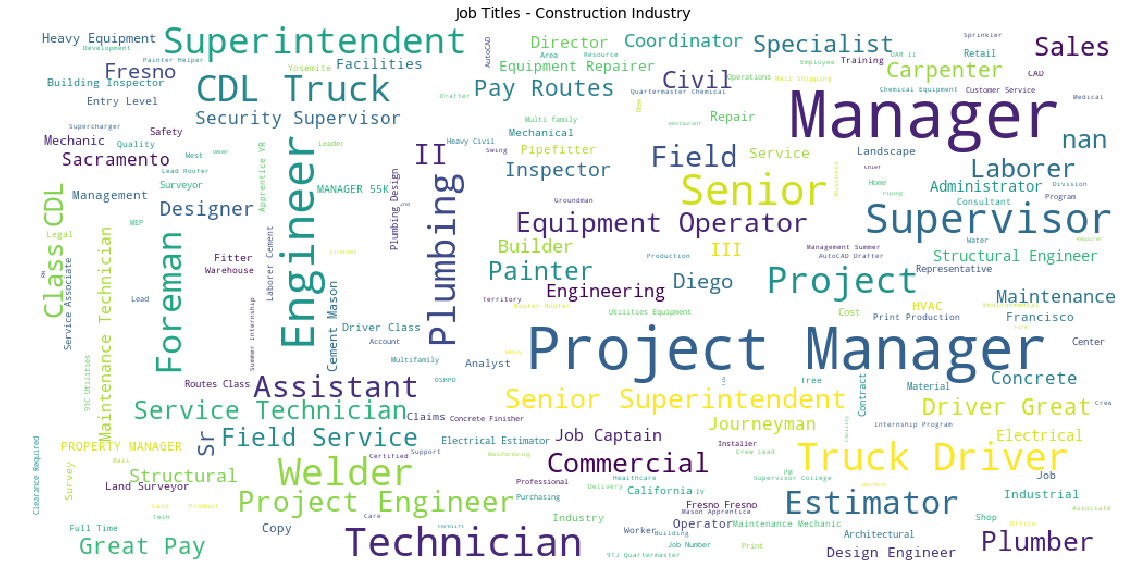

<Figure size 432x288 with 0 Axes>

In [36]:
#job titles word clouds
#generating positive reviews word cloud
Job_title_words = ' '.join(str(jt) for jt in df_jobs['Job_name'])

more_stopwords = {'Construction', 'Los Angeles', '91D', 'Angeles', 'Santa', 'Los', 'Hollywood', 'Anaheim', 'Monica', 'Needed', 'LAX',
                 'United', 'Relocation', 'Residential', 'Site', 'company', 'luxury', 'Openings', 'Custom', 'Immediate', 'High', 'Mig', 
                  'Guitar', 'Parking', 'Amazing', 'Top', 'End', 'San', 'Shift', 'CA' , 'Fe','LA','Mixed','Jose'
                 }
STOPWORDS = STOPWORDS.union(more_stopwords)

# remove URLs and words that start with @
Job_title_cleaned_tags = " ".join([word for word in Job_title_words.split()
                            ])

wordcloud = WordCloud(
                      #font_path='/Users/hmallajosyula/Library/Fonts/CabinSketch-Bold.ttf',
                      stopwords=STOPWORDS,
                      max_font_size=60,
                      background_color='white',
                      width = 1000,
                      height = 500
                     ).generate(Job_title_cleaned_tags)
plt.figure( figsize=(20,10) )
plt.title('Job Titles - Construction Industry')
plt.imshow(wordcloud)
plt.axis('off')
#plt.figure(figsize=(1000,1000))
plt.show()
plt.savefig('wordcloud_job_titles_construction_industries.png', bbox_inches='tight')

In [37]:
from nltk.stem import PorterStemmer

In [38]:
porter = PorterStemmer()

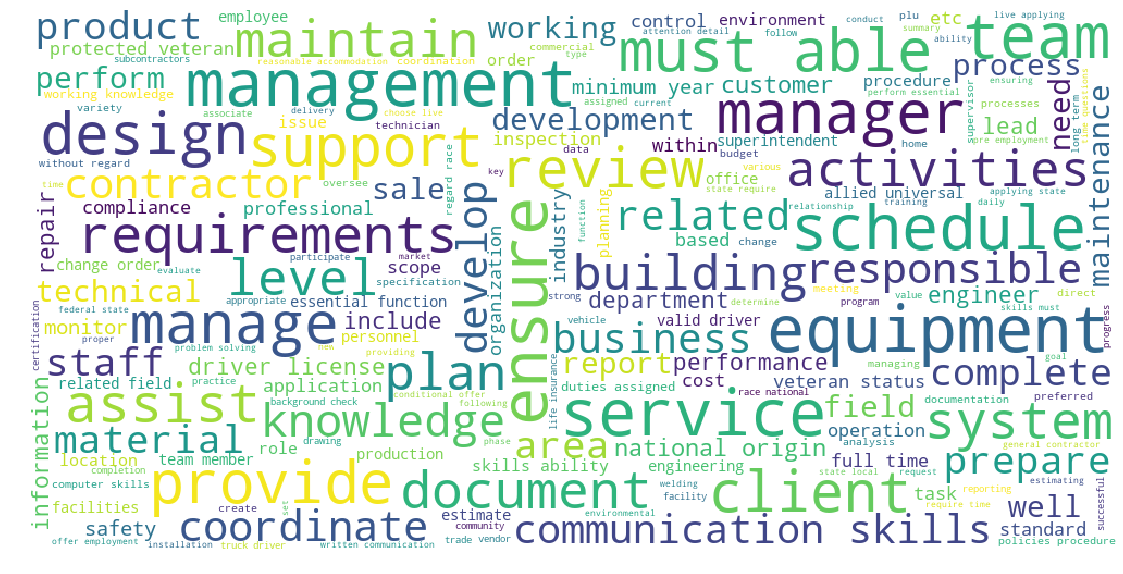

<Figure size 432x288 with 0 Axes>

In [39]:
#job titles word clouds
#generating positive reviews word cloud
Job_desc_words = ' '.join(porter.stem(str(jd)) for jd in df_jobs['Job_description'])

for word in Job_desc_words:
    re.sub(r'[^\w\s]','',word)


more_stopwords = {'sexual orientation', 'contract', 'bachelor', 'degree', 'necessary', 'religion' , 'color', 'looking', 'applicants', 
                  'required', 'use', 'responsibilities', 'experience', 'dental', 'vision', 'orientation', 'sexual', 'California'
                  'opportunities', 'Equal', 'opportunity', 'customer', 'work', 'project', 'including', 'requirement', 'will',
                  'projects', 'position', 'subcontractor', 'gender', 'identity', 'school', 'diploma', 'good', 
                  'job', 'description', 'asked', 'criminal', 'history', 'hiring', 'asked', 'answer', 'apply', 'race,',
                  'color,', 'religion,', 'sex', 'andor'
                 }
STOPWORDS = STOPWORDS.union(more_stopwords)

# remove URLs and words that start with @
Job_desc_cleaned_tags = " ".join([word for word in Job_desc_words.split()
                            ])

wordcloud = WordCloud(
                      #font_path='/Users/hmallajosyula/Library/Fonts/CabinSketch-Bold.ttf',
                      stopwords=STOPWORDS,
                      max_font_size=60,
                      background_color='white',
                      width = 1000,
                      height = 500
                     ).generate(Job_desc_cleaned_tags)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
#plt.figure(figsize=(1000,1000))
plt.show()
plt.savefig('wordcloud_job_desc.png', bbox_inches='tight')

In [40]:
import nltk
from nltk import FreqDist
from nltk.collocations import *
from nltk.tokenize import *

In [41]:
Job_desc_stopwords_cleaned = " ".join([word for word in Job_desc_words.split() if word.lower() not in STOPWORDS and len(word)>3
                            ])

In [42]:
Job_desc_stopwords_punc_cleaned = " ".join([re.sub(r'[^\w\s]','',word) for word in Job_desc_stopwords_cleaned.split() if word not in STOPWORDS
                            ])

In [43]:
#frequency distribution of positive reviews
long_words = [w.lower() for w in Job_desc_stopwords_punc_cleaned.split()]
fdist1 = FreqDist(long_words)
fdist1.most_common(50)

[('construction', 3821),
 ('ability', 1992),
 ('management', 1899),
 ('must', 1735),
 ('skills', 1655),
 ('equipment', 1489),
 ('team', 1462),
 ('years', 1434),
 ('safety', 1237),
 ('requirements', 1138),
 ('knowledge', 1137),
 ('service', 1118),
 ('manager', 1063),
 ('time', 978),
 ('engineering', 944),
 ('design', 939),
 ('quality', 914),
 ('duties', 905),
 ('ensure', 900),
 ('working', 871),
 ('employees', 864),
 ('site', 864),
 ('able', 858),
 ('training', 850),
 ('services', 833),
 ('field', 819),
 ('related', 810),
 ('provide', 771),
 ('andor', 765),
 ('benefits', 762),
 ('employment', 755),
 ('systems', 725),
 ('perform', 723),
 ('maintain', 718),
 ('maintenance', 713),
 ('preferred', 704),
 ('business', 687),
 ('environment', 681),
 ('responsible', 670),
 ('required', 661),
 ('high', 656),
 ('building', 653),
 ('support', 651),
 ('include', 650),
 ('information', 641),
 ('development', 639),
 ('procedures', 639),
 ('reports', 638),
 ('minimum', 612),
 ('experience', 612)]

In [44]:
Job_desc_stopwords_punc_cleaned

'are webcor employs people integrity passion build diverse highprofile innovative structures clients webcor founded francisco 1971 still headquartered francisco committed growing throughout california and beyond career development employeespecific rotation plans foster collaboration across construction management divisions core shell special projects selfperform groups concrete interior construction group paramount drywall provide craft professionals experienced professionals graduates financial health wellness benefits encourage reward individual contribution join love build public private owners dont away never done before deeply connected continuous improvement welcome better ways things us green building council recognized multiple leed platinum awards commitment sustainable design communities construction career tracks clear encourage employee mobility development average cost medical benefits employees families cover total cost dental vision life disability insurance offer genero

In [45]:
fdist2= FreqDist(nltk.ngrams(Job_desc_stopwords_punc_cleaned.split(),2))
fdist2.most_common(300)

[(('must', 'able'), 511),
 (('construction', 'management'), 422),
 (('communication', 'skills'), 302),
 (('equal', 'employer'), 291),
 (('construction', 'manager'), 254),
 (('national', 'origin'), 243),
 (('drivers', 'license'), 232),
 (('minimum', 'years'), 226),
 (('veteran', 'status'), 201),
 (('duties', 'assigned'), 189),
 (('skills', 'ability'), 181),
 (('united', 'states'), 172),
 (('valid', 'drivers'), 170),
 (('essential', 'functions'), 168),
 (('working', 'knowledge'), 161),
 (('without', 'regard'), 158),
 (('related', 'field'), 155),
 (('policies', 'procedures'), 154),
 (('computer', 'skills'), 142),
 (('design', 'construction'), 135),
 (('life', 'insurance'), 131),
 (('andor', 'applying'), 130),
 (('allied', 'universal'), 127),
 (('truck', 'drivers'), 124),
 (('team', 'members'), 123),
 (('protected', 'veteran'), 123),
 (('applying', 'state'), 122),
 (('choose', 'answer'), 121),
 (('answer', 'live'), 121),
 (('live', 'andor'), 121),
 (('state', 'require'), 121),
 (('require'

In [46]:
import re
##s = 'vision,'
##s = re.sub(r'[^\w\s]','',s)
#s

In [49]:
with open("bigrams_skills_raw_data_construction_industry.csv", "w") as fp:
    writer = csv.writer(fp, quoting=csv.QUOTE_ALL)
    writer.writerows(fdist2.most_common(300))

In [50]:
count_words=0
for w in Job_desc_stopwords_punc_cleaned.split():
    count_words = count_words+1
print(count_words)

306829


In [51]:
df_bigrams=pd.read_csv('bigrams_skills_cleaned_labelled_manually_construction_industry.csv')

In [52]:
df_bigrams.head()

Bigram  Frequency       Label
0  construction management        422  Hard Skill
1     communication skills        302  Soft Skill
2          duties assigned        189  Soft Skill
3            valid drivers        170  Hard Skill
4      policies procedures        154  Soft Skill

In [53]:
df_hardskills = df_bigrams[df_bigrams['Label']=='Hard Skill']

In [54]:
len(df_hardskills)

193

In [55]:
df_hardskills.head()

Bigram  Frequency       Label
0  construction management        422  Hard Skill
3            valid drivers        170  Hard Skill
5          computer skills        142  Hard Skill
6      design construction        135  Hard Skill
9        perform essential        105  Hard Skill

In [56]:
df_hardskills.reset_index(inplace=True)

In [57]:
df_hardskills.head()

index                   Bigram  Frequency       Label
0      0  construction management        422  Hard Skill
1      3            valid drivers        170  Hard Skill
2      5          computer skills        142  Hard Skill
3      6      design construction        135  Hard Skill
4      9        perform essential        105  Hard Skill

In [58]:
df_hardskills.drop(df_hardskills.columns[0],axis=1,inplace=True)

C:\Users\myrtmp235\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [59]:
df_hardskills.head()

Bigram  Frequency       Label
0  construction management        422  Hard Skill
1            valid drivers        170  Hard Skill
2          computer skills        142  Hard Skill
3      design construction        135  Hard Skill
4        perform essential        105  Hard Skill

In [60]:
df_hardskills.drop(df_hardskills.columns[2],axis=1,inplace=True)

C:\Users\myrtmp235\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [61]:
df_hardskills.head()

Bigram  Frequency
0  construction management        422
1            valid drivers        170
2          computer skills        142
3      design construction        135
4        perform essential        105

In [62]:
##top 50 hardskills
df_hardskills_50 = df_hardskills.head(50)

In [63]:
##top 25 hardskills
df_hardskills_25 = df_hardskills.head(25)

In [64]:
word_dict={}

In [65]:
word_dict=pd.Series(df_hardskills.Frequency.values,index=df_hardskills.Bigram).to_dict()

In [66]:
word_dict

{'construction management': 422,
 'valid drivers': 170,
 'computer skills': 142,
 'design construction': 135,
 'perform essential': 105,
 'word excel': 103,
 'engineering construction': 102,
 'ability read': 102,
 'microsoft office': 100,
 'hand tools': 99,
 'written verbal': 97,
 'written communication': 96,
 'quality control': 95,
 'power tools': 94,
 'civil engineering': 93,
 'construction projects': 86,
 'operations manager': 70,
 'site safety': 68,
 'knowledge construction': 66,
 'physical demands': 66,
 'read understand': 62,
 'construction documents': 60,
 'construction equipment': 57,
 'hand power': 57,
 'local laws': 56,
 'mechanical electrical': 56,
 'safety quality': 55,
 'construction activities': 55,
 'written oral': 53,
 'mechanical engineering': 53,
 'excellent written': 52,
 'safety standards': 52,
 'safe practices': 50,
 'climb ladders': 49,
 'oral written': 49,
 'cost control': 48,
 'operations maintenance': 48,
 'protective equipment': 47,
 'building codes': 47,
 'ab

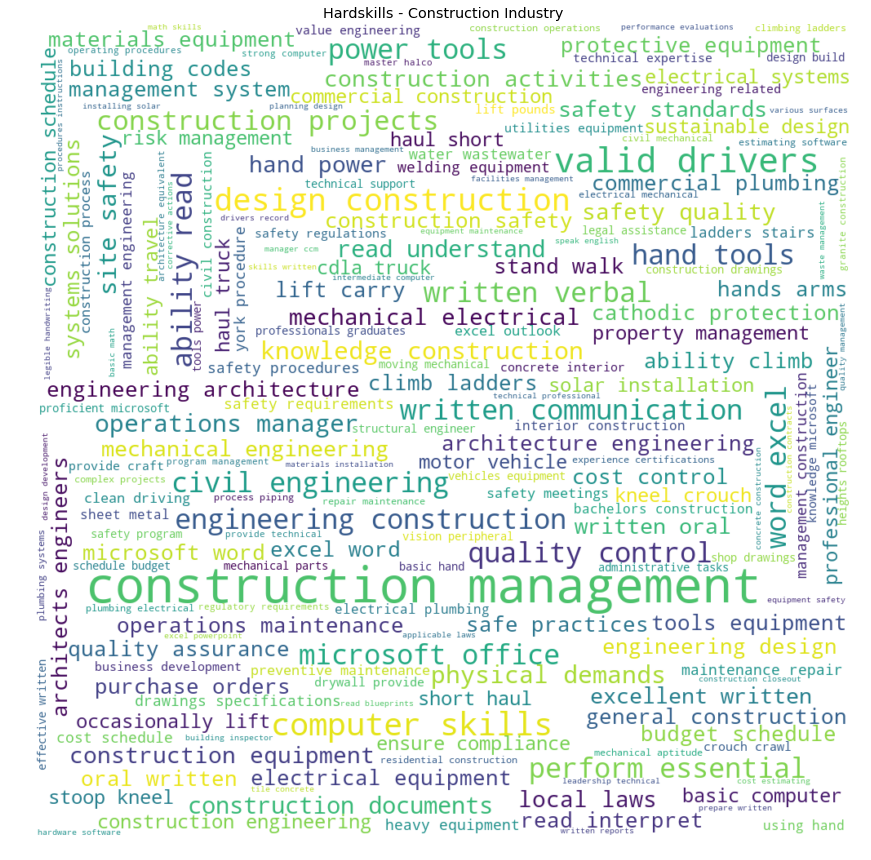

In [67]:

wordCloud = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud.generate_from_frequencies(word_dict)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Hardskills - Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Hardskills_frequent_words.png', bbox_inches='tight') 
#wordCloud.to_file("Hardskills_frequent_words.png")
 

In [68]:
word_dict_hs_50=pd.Series(df_hardskills_50.Frequency.values,index=df_hardskills_50.Bigram).to_dict()

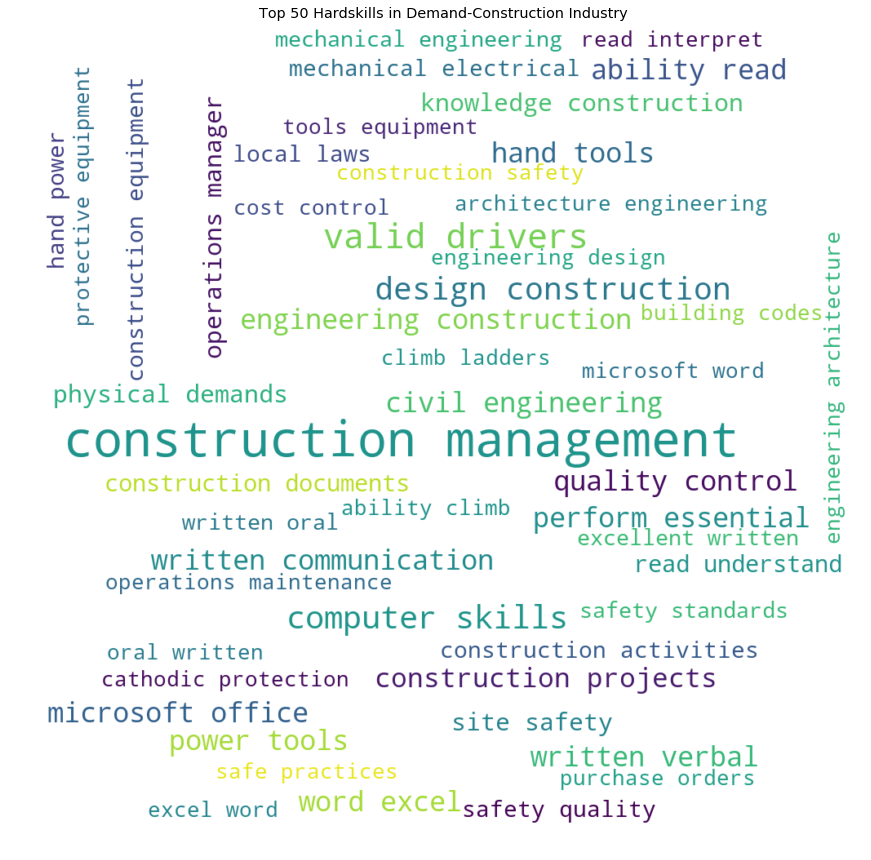

In [69]:
wordCloud_hs_50 = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_hs_50.generate_from_frequencies(word_dict_hs_50)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_hs_50, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top 50 Hardskills in Demand-Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Hardskills_top_50_demand_side.png', bbox_inches='tight') 
#wordCloud.to_file("Hardskills_frequent_words.png")
 

In [70]:
word_dict_hs_25=pd.Series(df_hardskills_25.Frequency.values,index=df_hardskills_25.Bigram).to_dict()

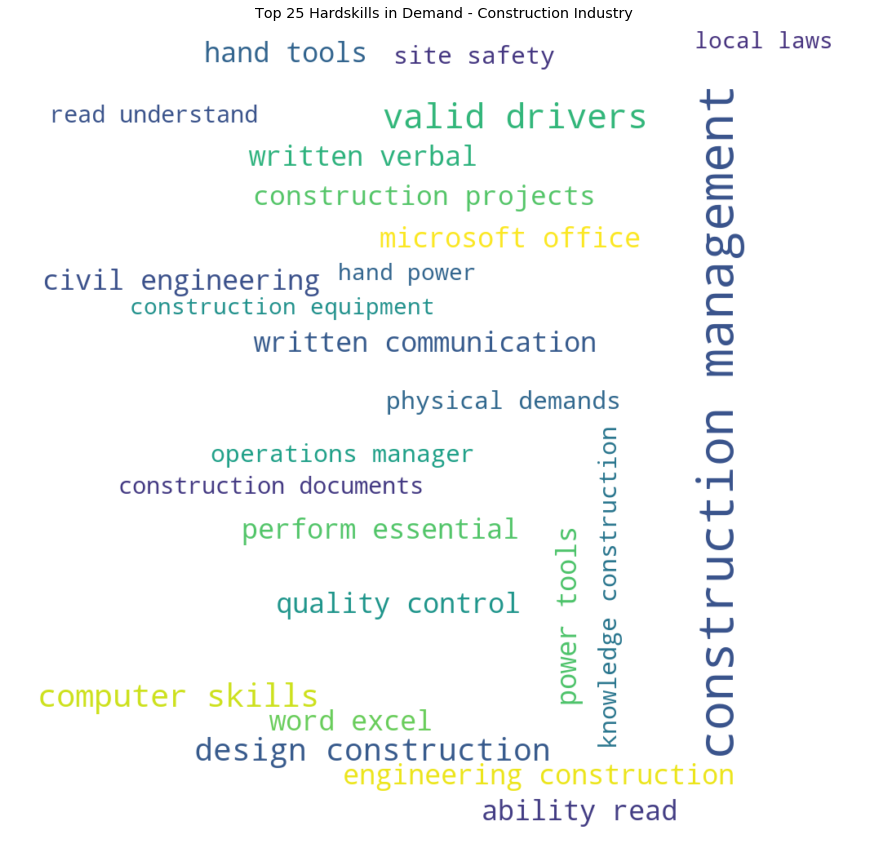

In [71]:
wordCloud_hs_25 = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_hs_25.generate_from_frequencies(word_dict_hs_25)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_hs_25, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top 25 Hardskills in Demand - Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Hardskills_top_25_Demand_Side.png', bbox_inches='tight') 
#wordCloud.to_file("Hardskills_frequent_words.png")
 

In [72]:
df_softskills = df_bigrams[df_bigrams['Label']=='Soft Skill']

In [73]:
df_softskills.reset_index(inplace=True)

In [74]:
df_softskills.head()

index                Bigram  Frequency       Label
0      1  communication skills        302  Soft Skill
1      2       duties assigned        189  Soft Skill
2      4   policies procedures        154  Soft Skill
3     11      attention detail        103  Soft Skill
4     12         timely manner        102  Soft Skill

In [75]:
df_softskills.drop(df_softskills.columns[0],axis=1,inplace=True)

C:\Users\myrtmp235\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [76]:
df_softskills.drop(df_softskills.columns[2],axis=1,inplace=True)

C:\Users\myrtmp235\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [77]:
df_softskills.head()

Bigram  Frequency
0  communication skills        302
1       duties assigned        189
2   policies procedures        154
3      attention detail        103
4         timely manner        102

In [78]:
df_softskills_50 = df_softskills.head(50)

In [79]:
df_softskills_25 = df_softskills.head(25)

In [80]:
word_dict_ss=pd.Series(df_softskills.Frequency.values,index=df_softskills.Bigram).to_dict()

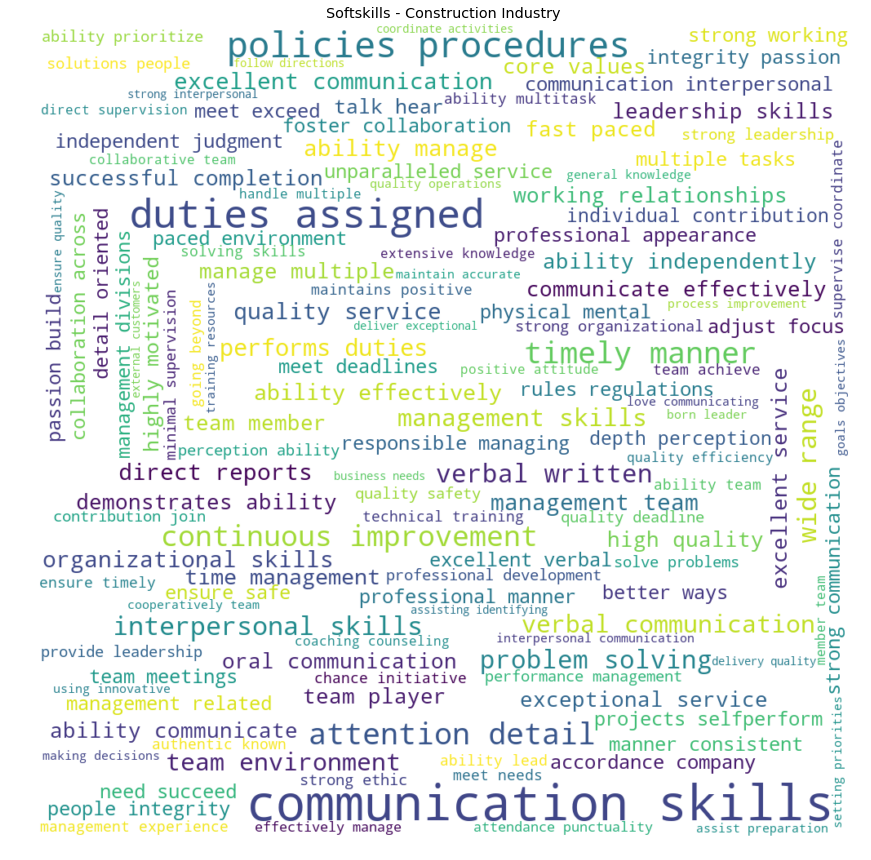

In [81]:
wordCloud_ss = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_ss.generate_from_frequencies(word_dict_ss)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_ss, interpolation = 'bilinear')
plt.axis('off')
plt.title('Softskills - Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Softskills_frequent_words.png', bbox_inches='tight') 
#wordCloud.to_file("Softskills_frequent_words.png")
 

In [82]:
word_dict_ss_50=pd.Series(df_softskills_50.Frequency.values,index=df_softskills_50.Bigram).to_dict()

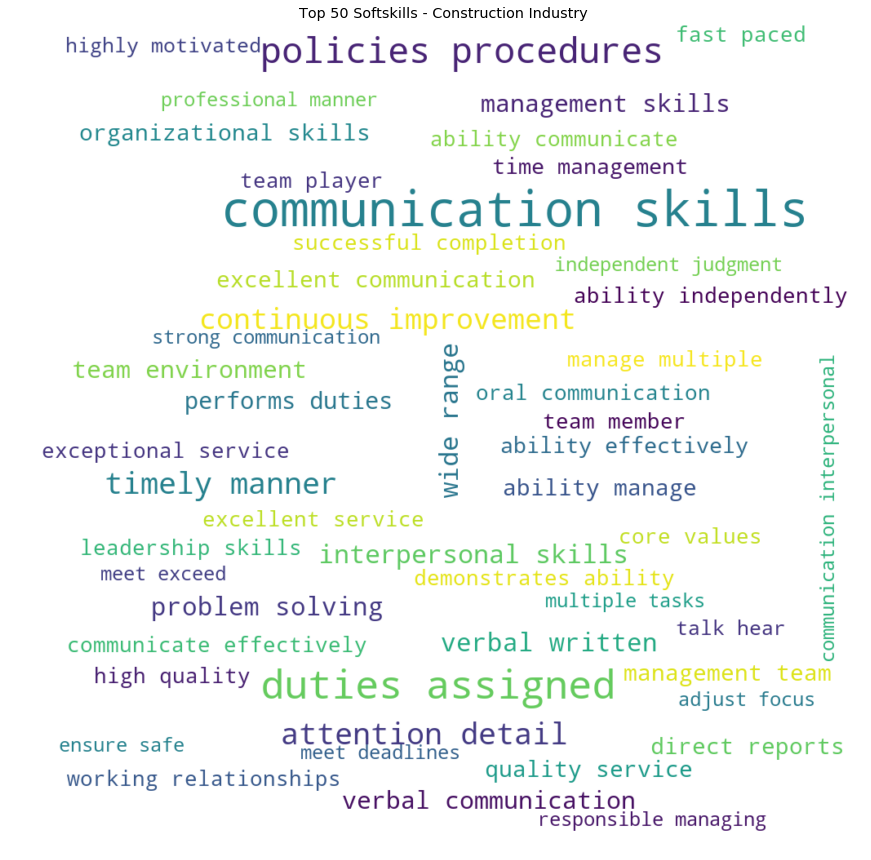

In [83]:
wordCloud_ss_50 = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_ss_50.generate_from_frequencies(word_dict_ss_50)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_ss_50, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top 50 Softskills - Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Softskills_top50_words.png', bbox_inches='tight') 
#wordCloud.to_file("Softskills_frequent_words.png")
 

In [84]:
word_dict_ss_25=pd.Series(df_softskills_25.Frequency.values,index=df_softskills_25.Bigram).to_dict()

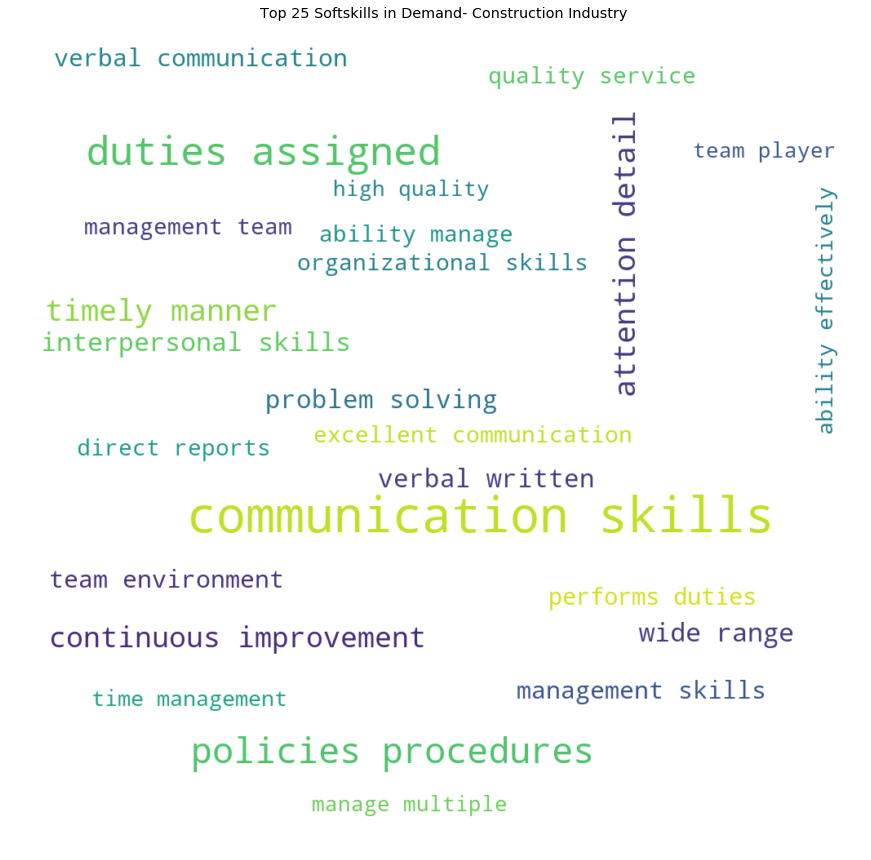

In [85]:
wordCloud_ss_25 = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_ss_25.generate_from_frequencies(word_dict_ss_25)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_ss_25, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top 25 Softskills in Demand- Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Softskills_top25_Demand_side.png', bbox_inches='tight') 
#wordCloud.to_file("Softskills_frequent_words.png")

In [86]:
df_benefits = df_bigrams[df_bigrams['Label']=='Benefits']

In [87]:
df_benefits.reset_index(inplace=True)

In [88]:
df_benefits.drop(df_benefits.columns[0],axis=1,inplace=True)

C:\Users\myrtmp235\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [89]:
df_benefits.drop(df_benefits.columns[2],axis=1,inplace=True)

C:\Users\myrtmp235\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [90]:
df_benefits.head()

Bigram  Frequency
0    life insurance        131
1    medical dental        116
2     dental vision         92
3  benefits package         92
4     paid holidays         86

In [ ]:
df_benefits_50 = df_benefits.head(50)

In [101]:
word_dict_b_50=pd.Series(df_benefits_50.Frequency.values,index=df_benefits_50.Bigram).to_dict()

In [91]:
word_dict_b=pd.Series(df_benefits.Frequency.values,index=df_benefits.Bigram).to_dict()

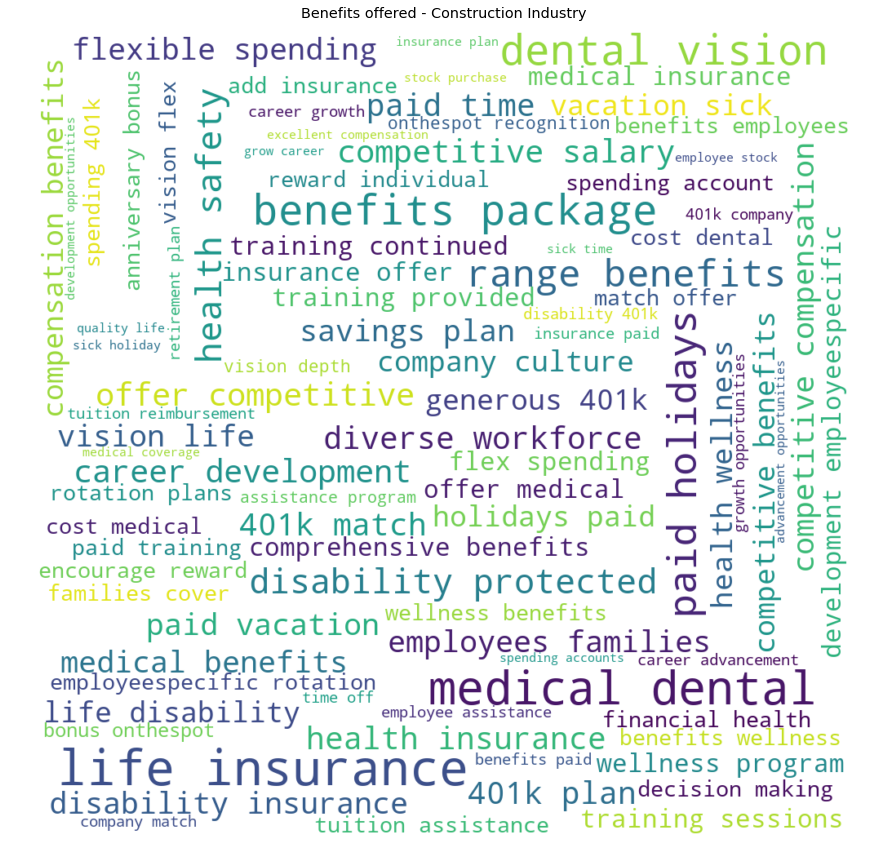

In [92]:
wordCloud_b = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_b.generate_from_frequencies(word_dict_b)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_b, interpolation = 'bilinear')
plt.axis('off')
plt.title('Benefits offered - Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Benefits_frequent_words.png', bbox_inches='tight')  
#wordCloud.to_file("Benefits_frequent_words.png")
 

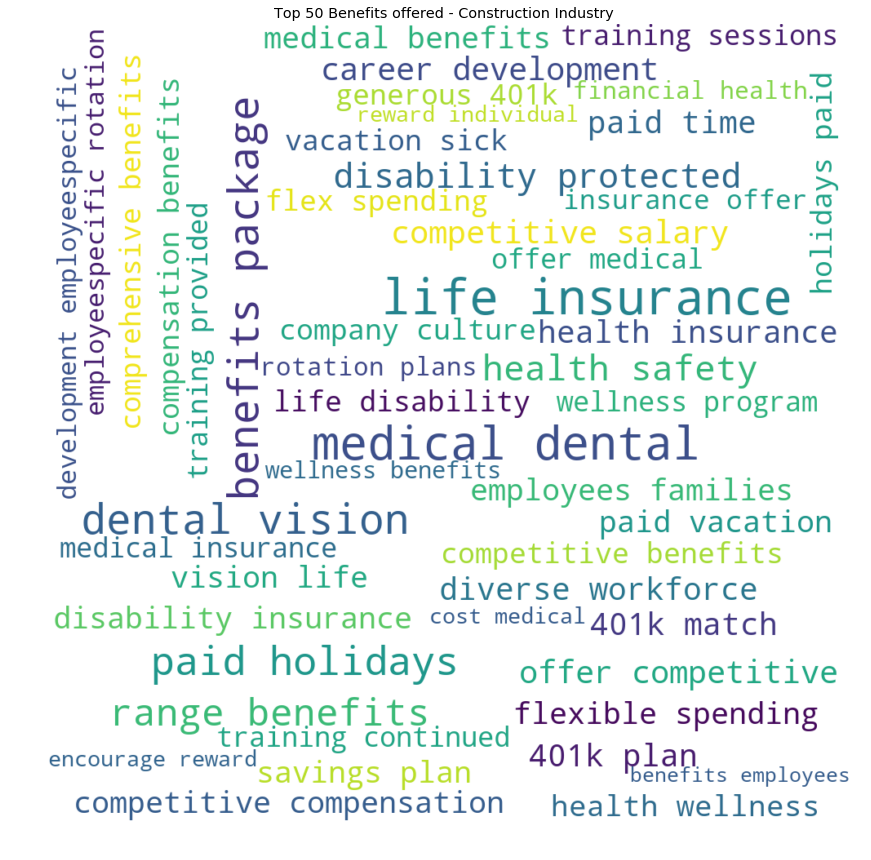

In [103]:
wordCloud_b_50 = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_b_50.generate_from_frequencies(word_dict_b_50)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_b_50, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top 50 Benefits offered - Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Benefits_frequent_50_words.png', bbox_inches='tight')  
#wordCloud.to_file("Benefits_frequent_words.png")

In [104]:
df_exp = df_bigrams[df_bigrams['Label']=='Experience Level']

In [105]:
df_exp.head()

Bigram  Frequency             Label
32             five years         72  Experience Level
44      experience please         61  Experience Level
63    seeking experienced         52  Experience Level
70            three years         50  Experience Level
85  combination education         47  Experience Level

In [106]:
df_exp.reset_index(inplace=True)

In [107]:
df_exp.drop(df_exp.columns[0],axis=1,inplace=True)

C:\Users\myrtmp235\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [108]:
df_exp.drop(df_exp.columns[2],axis=1,inplace=True)

C:\Users\myrtmp235\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [109]:
word_dict_e=pd.Series(df_exp.Frequency.values,index=df_exp.Bigram).to_dict()

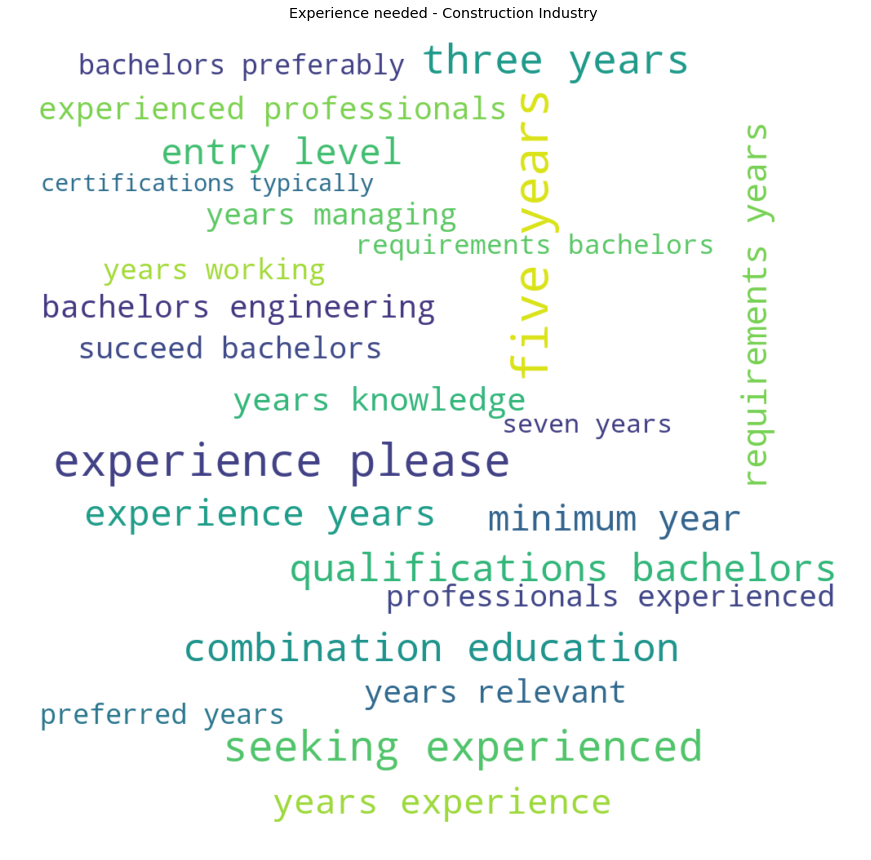

In [110]:
wordCloud_e = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_e.generate_from_frequencies(word_dict_e)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_e, interpolation = 'bilinear')
plt.axis('off')
plt.title('Experience needed - Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Experience_frequent_words.png', bbox_inches='tight')  
#wordCloud.to_file("Experience_frequent_words.png")
 